### Evaluate the presence of sample level batch effects by PILOT (Subgroups of patients)

<div class="alert alert-block alert-info">
In this tutorial, we will demonstrate how to use statistical tests to evaluate the potential association between the detected subgroups of patients with any experimental or clinical variable present in a data set. This example will be based on the kidney single cell data.
</div>

In [1]:
import pilotpy as pl
import scanpy as sc
import pandas as pd

#### Reading the original Anndata:
First, we consider the original kidney single cell data. You can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/Kidney_ori.h5ad), and place it in the _Datasets_ folder.

In [2]:
adata = sc.read_h5ad('/Datasets/Kidney_ori.h5ad')

##### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
- adata: Pass your loaded Anndata object to PILOT.
    
- emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
- clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
- sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
- status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(
    adata,
    emb_matrix = 'X_pca',
    clusters_col = 'cell_type',
    sample_col = 'donor_id',
    status = 'disease'
    )

##### Patients sub-group detection by clustering the Wasserstein distance. 

<div class="alert alert-block alert-info"> 
The Silhouette Score Curve is used to find the optimal number of clusters by plotting the average Silhouette Score for different numbers of clusters. The number of clusters corresponding to the highest average Silhouette Score is considered the optimal number of clusters. Then, we demonstrate the heatmap of the found clusters.
</div>

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Fal

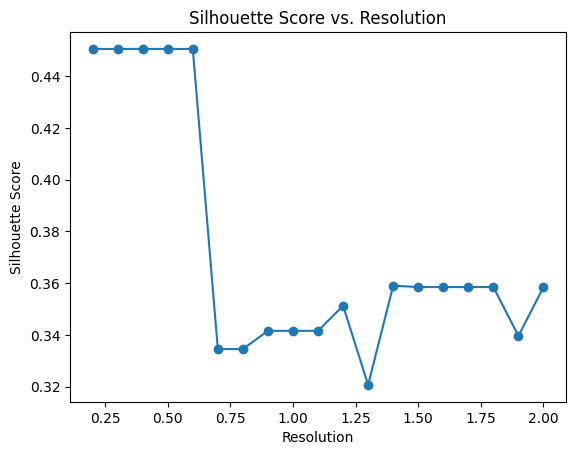

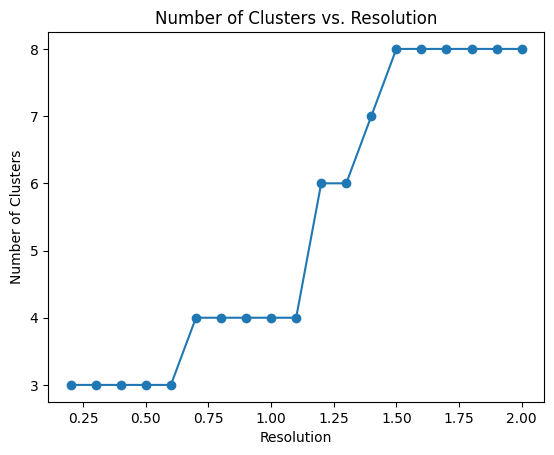

In [4]:
pl.pl.select_best_sil(adata, start = 0.2)

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.


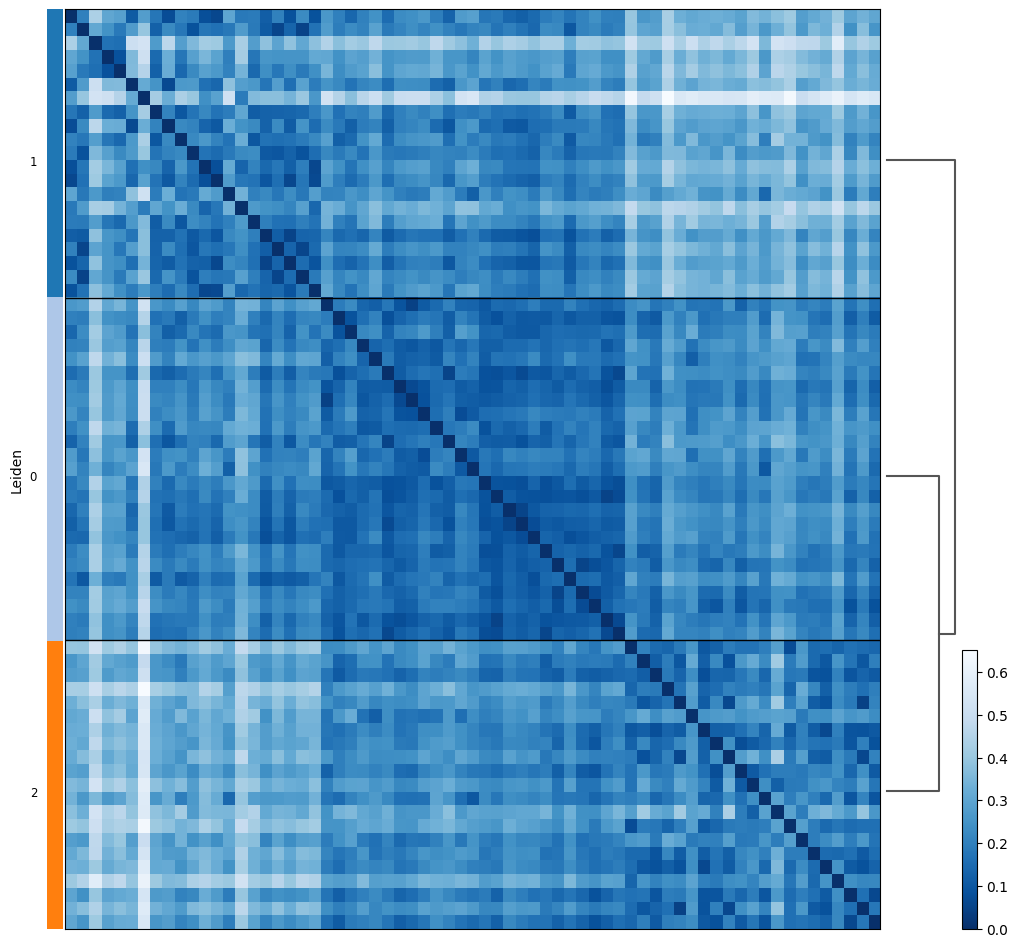

In [6]:
proportion_df=pl.pl.clustering_emd(adata, res = adata.uns['best_res'],show_gene_labels=False,sorter_leiden=['1','0','2'],save=True)

##### Evaluation of the association of estimated subgroups with experimental factor:
A very important question is if PILOT analysis is affected by experimental artefacts (location of tissues, batch processing). To evaluate this, we use ANOVA statistics and  Chi-Squared correlation to check any association between any variables describing the found clusters. 
To run these functions, provide the sample_col as the Sample/Patient column and your interested variables. Of note, these functions only show the  significant variables (p-value < 0.05).


In [7]:
categorical = ['BMI','hypertension','development_stage','sex','eGFR','diabetes_history','disease','tissue']

In [8]:
pl.tl.correlation_categorical_with_clustering(adata, proportion_df, sample_col = 'donor_id', features = categorical)

,Feature,ChiSquared_Statistic,ChiSquared_PValue
7,tissue,21.906065,0.001259
0,BMI,18.291352,0.005544
6,disease,10.600704,0.031438


Similarly, you can do the same analysis for numerical variables. 

In [9]:
numeric = ['degen.score','aStr.score','aEpi.score','matrisome.score','collagen.score','glycoprotein.score','proteoglycan.score']

In [10]:
pl.tl.correlation_numeric_with_clustering(adata, proportion_df, sample_col = 'donor_id', features = numeric)

,Feature,ANOVA_F_Statistic,ANOVA_P_Value




We observe that there is a clear association between the sub-clusters and the origin of the biopsies. This is not surprising as PILOT uses cellular composition information, as samples at distinct regions do have distinct cells.

To double check these results, one can of course plot the heatmap of clusters by showing the variables with 'clinical_variables_corr_sub_clusters' function. 

###### Disease

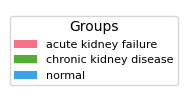

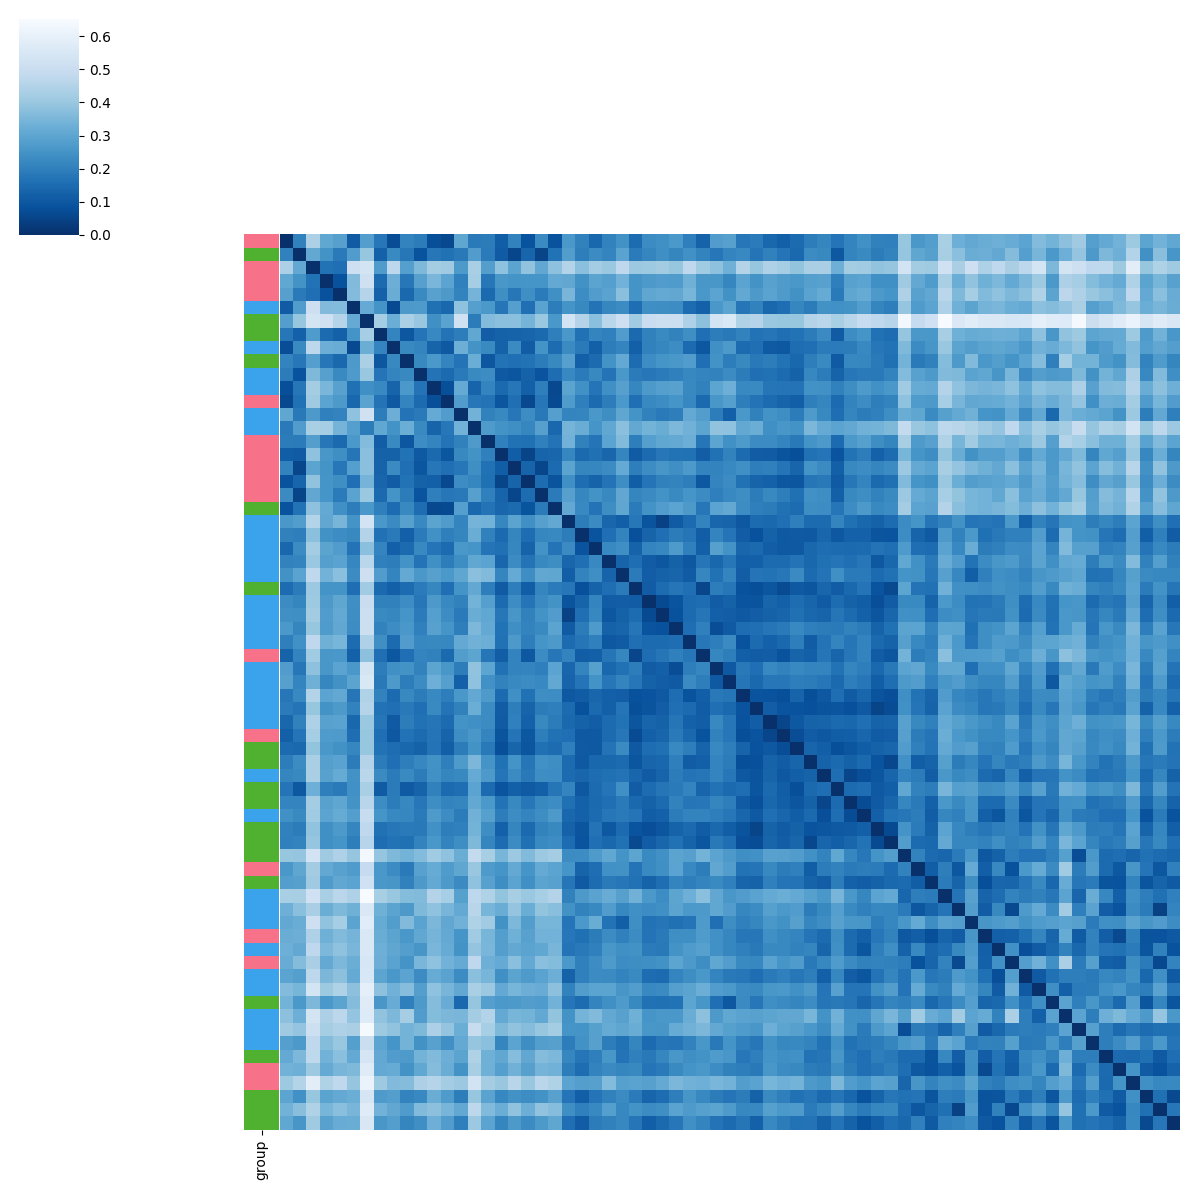

In [12]:
pl.tl.clinical_variables_corr_sub_clusters(adata,sorter_order=['1','0','2'],sample_col='donor_id',feature='disease',proportion_df=proportion_df,figsize_legend=(1,1))

###### Tissue

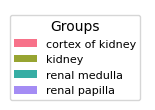

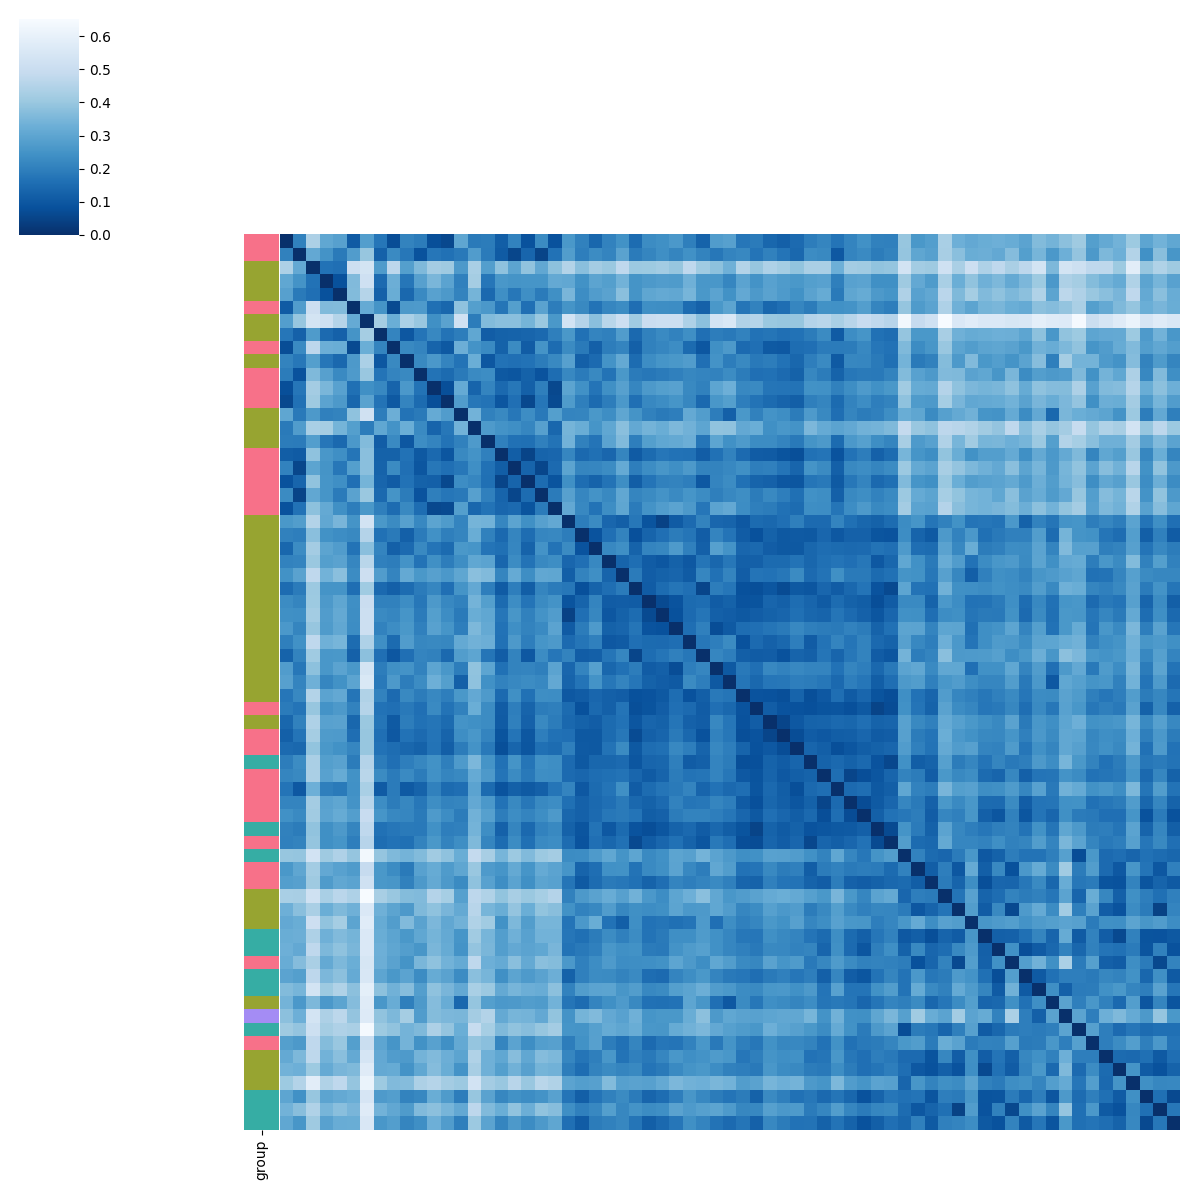

In [14]:
pl.tl.clinical_variables_corr_sub_clusters(adata,sorter_order=['1','0','2'],sample_col='donor_id',feature='tissue',proportion_df=proportion_df,figsize_legend=(1,1))

###### BMI

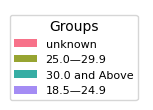

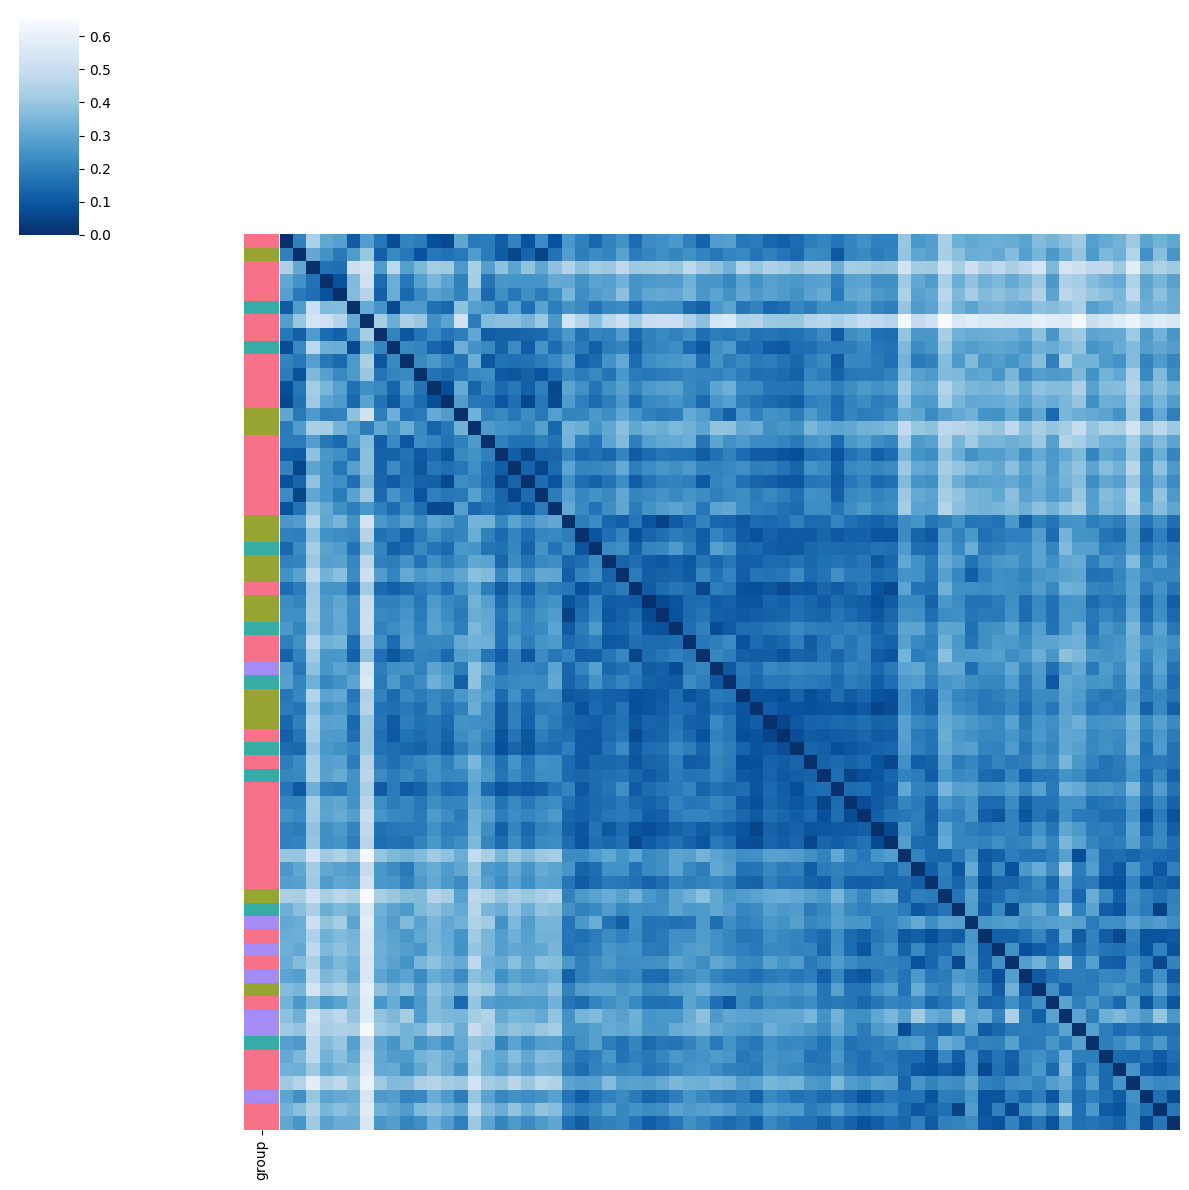

In [15]:
pl.tl.clinical_variables_corr_sub_clusters(adata,sorter_order=['1','0','2'],sample_col='donor_id',feature='BMI',proportion_df=proportion_df,figsize_legend=(1,1))

#### Filtering of samples

Therefore, we only focus on biopsies from sample locationn 'kidney', which were used in our benchmarking. You can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/Kidney_filtered.h5ad), and place it in the _Datasets_ folder.

In [16]:
adata_filtered=sc.read_h5ad('/Datasets/Kidney.h5ad')

In [17]:
pl.tl.wasserstein_distance(
    adata_filtered,
    emb_matrix = 'X_pca',
    clusters_col = 'cell_type',
    sample_col = 'donor_id',
    status = 'disease'
    )

Run the same functions for the filtered data.

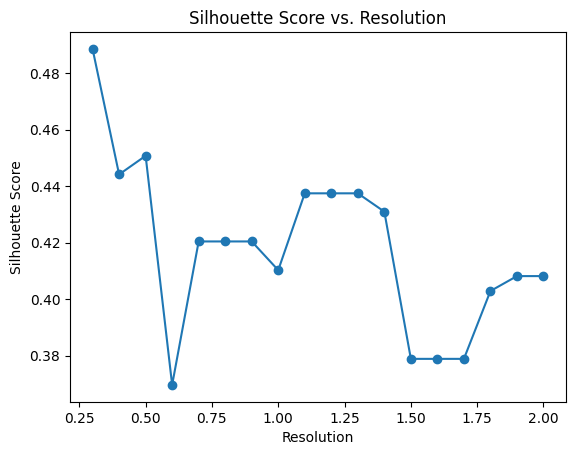

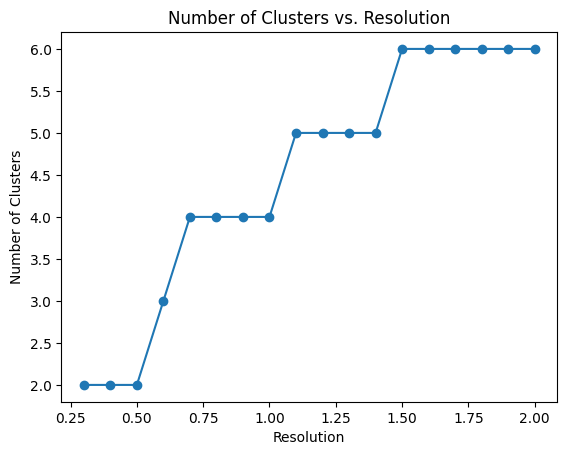

In [18]:
pl.pl.select_best_sil(adata_filtered, start = 0.3)

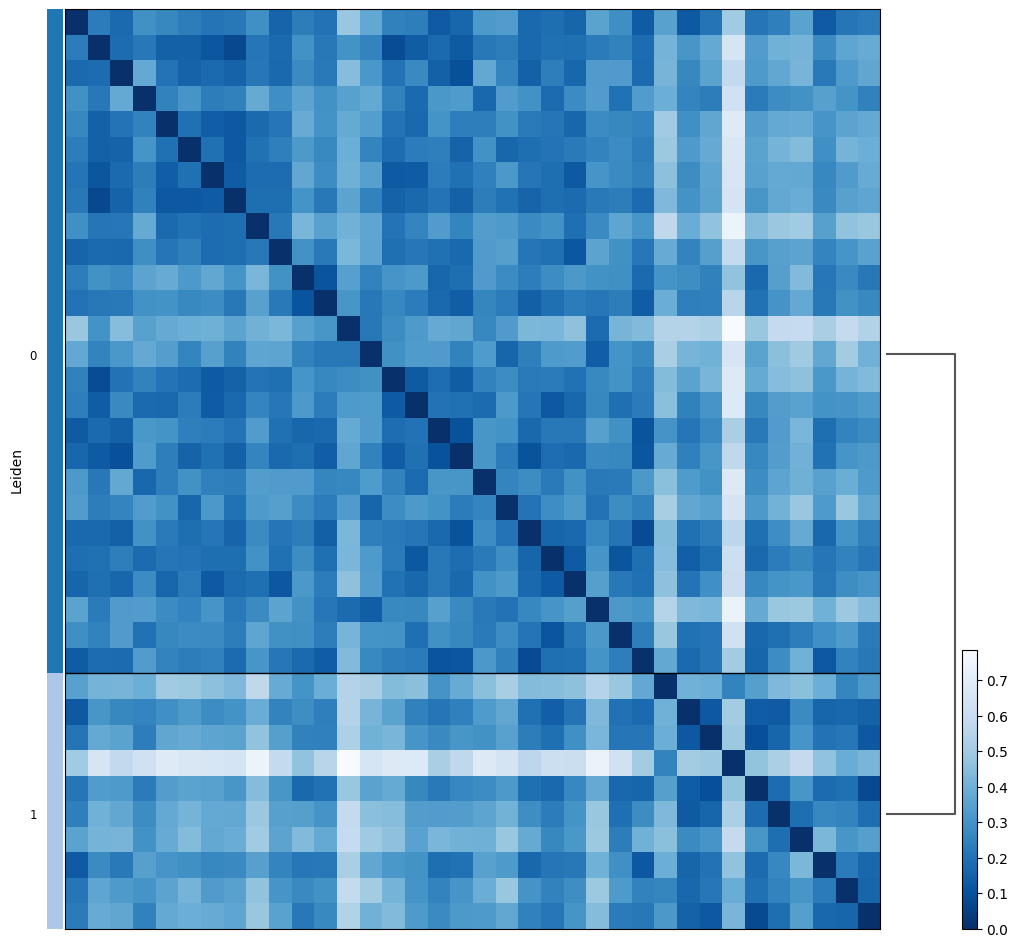

In [19]:
proportion_df=pl.pl.clustering_emd(adata_filtered, res = adata_filtered.uns['best_res'],show_gene_labels=False,sorter_leiden=['0','1'],save=True)

We next recheck the association of variables with the estimated sub-clusters. 

In [20]:
pl.tl.correlation_categorical_with_clustering(adata_filtered,proportion_df,sample_col= 'donor_id', features = categorical)

,Feature,ChiSquared_Statistic,ChiSquared_PValue
6,disease,17.488757,0.000159
5,diabetes_history,6.784615,0.009195
0,BMI,7.857195,0.049057




In the data we observed that the true label (disease) has the highest association followed by Diabetes History and BMI.

We can show the distribution of variables in the found clusters:

##### Disease

In [21]:
meta=adata_filtered.obs[['diabetes_history','BMI','donor_id','disease']]
meta = meta.drop_duplicates(subset='donor_id').rename(columns={'donor_id': 'sampleID'})
proportion=proportion_df[['Predicted_Labels','sampleID']].merge(meta,on='sampleID')
contingency_table = pd.crosstab(proportion['disease'], proportion['Predicted_Labels'],values=proportion['sampleID'], aggfunc=pd.Series.nunique, margins=True, margins_name='Total Unique Patients')
# Display the contingency table
contingency_table

Predicted_Labels,0,1,Total Unique Patients
disease,,,
Normal,17.0,1.0,18
acute kidney failure,NaN,5.0,5
chronic kidney disease,9.0,4.0,13
Total Unique Patients,26.0,10.0,36


##### BMI

In [22]:

contingency_table = pd.crosstab(proportion['BMI'], proportion['Predicted_Labels'],values=proportion['sampleID'], aggfunc=pd.Series.nunique, margins=True, margins_name='Total Unique Patients')
contingency_table

Predicted_Labels,0,1,Total Unique Patients
BMI,,,
18.5—24.9,2.0,NaN,2
25.0—29.9,10.0,1.0,11
30.0 and Above,4.0,NaN,4
unknown,10.0,9.0,19
Total Unique Patients,26.0,10.0,36


##### Diabetes history

In [23]:
contingency_table = pd.crosstab(proportion['diabetes_history'], proportion['Predicted_Labels'],values=proportion['sampleID'], aggfunc=pd.Series.nunique, margins=True, margins_name='Total Unique Patients')
# Display the contingency table
contingency_table

Predicted_Labels,0,1,Total Unique Patients
diabetes_history,,,
No,17,1,18
Yes,9,9,18
Total Unique Patients,26,10,36



To double check these results, one can of course plot the heatmap of clusters by showing the variables with 'clinical_variables_corr_sub_clusters' function. 


###### Disease

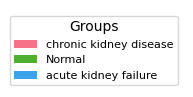

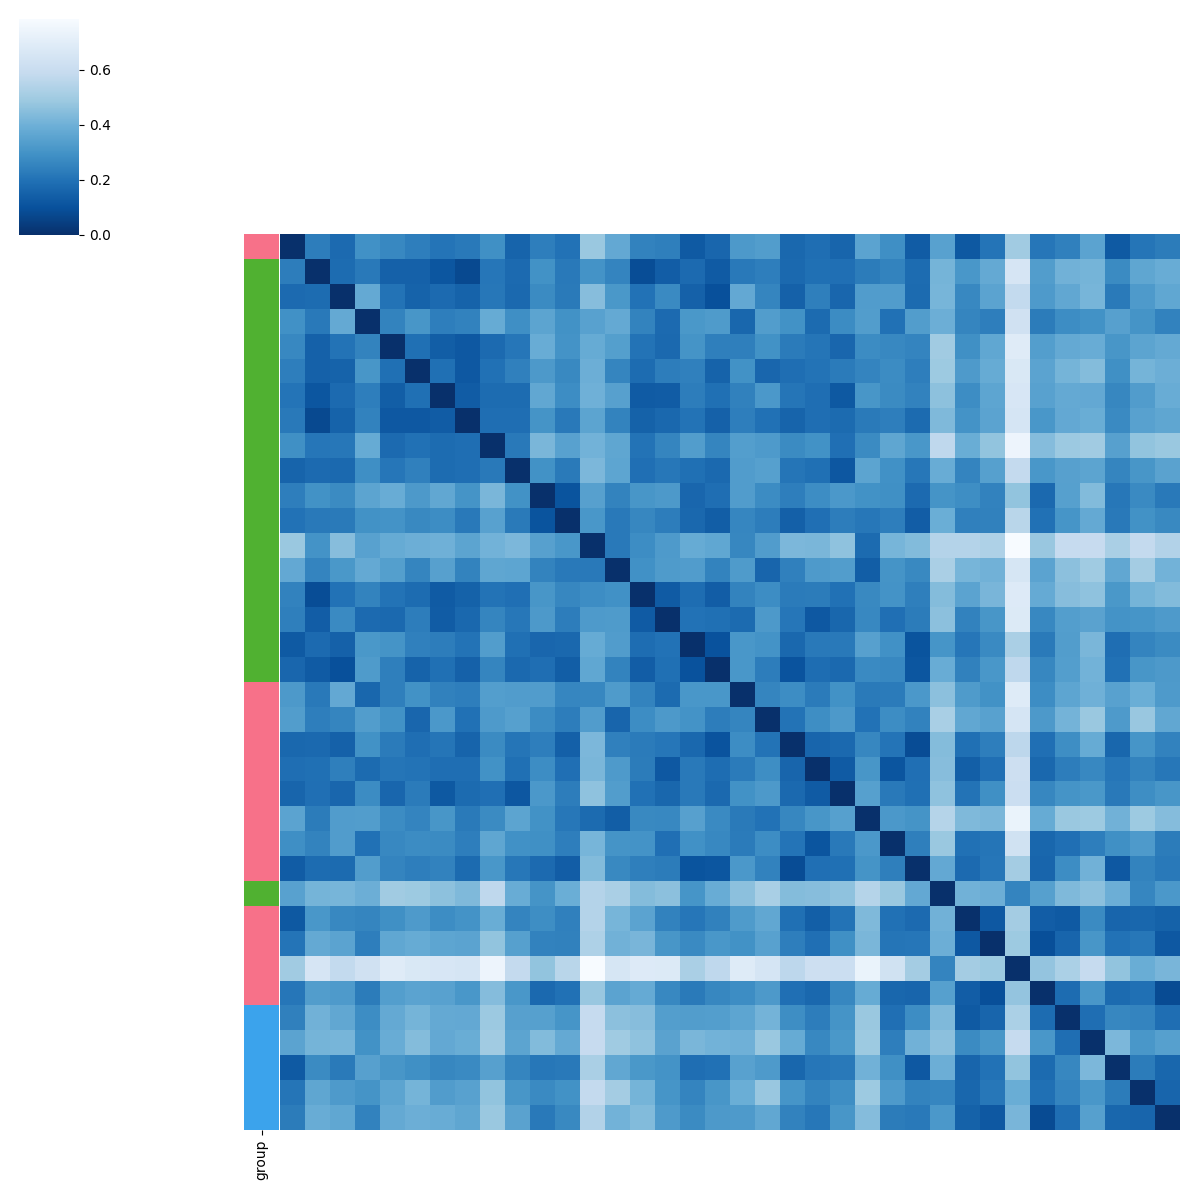

In [25]:
pl.tl.clinical_variables_corr_sub_clusters(adata_filtered, sorter_order=['0','1'],sample_col='donor_id',feature= 'disease',proportion_df = proportion_df,figsize_legend=(1,1))

###### BMI

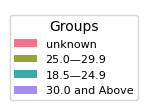

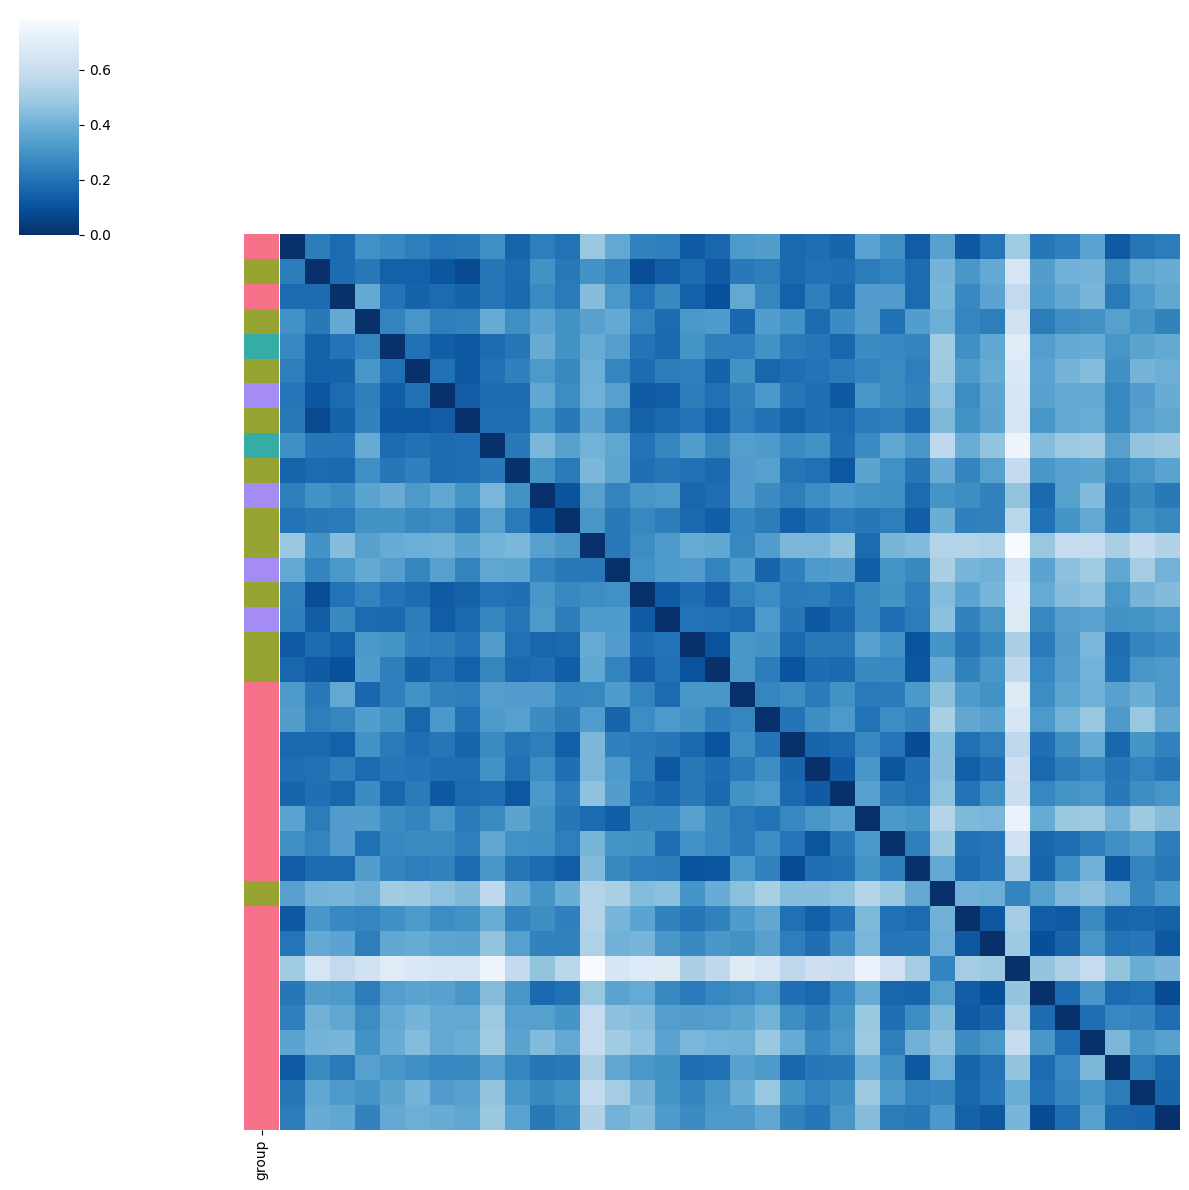

In [26]:
pl.tl.clinical_variables_corr_sub_clusters(adata_filtered, sorter_order = ['0','1'],sample_col = 'donor_id',feature = 'BMI',proportion_df = proportion_df,figsize_legend=(1,1))

###### Diabetes_history

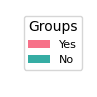

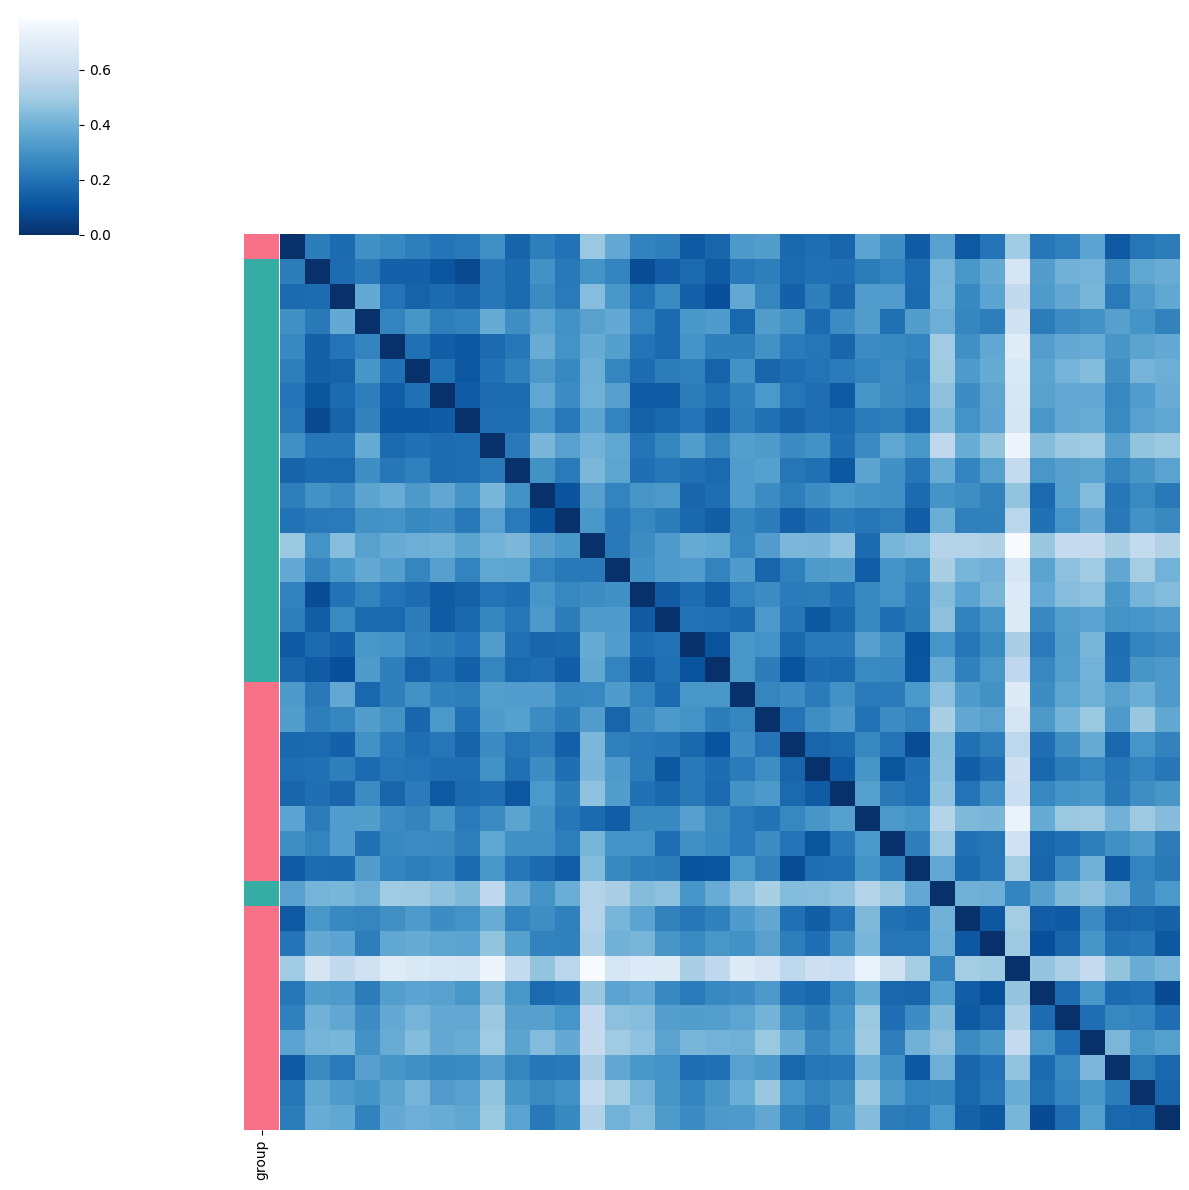

In [27]:
pl.tl.clinical_variables_corr_sub_clusters(adata_filtered, sorter_order = ['0','1'],sample_col = 'donor_id',feature = 'diabetes_history',proportion_df = proportion_df,figsize_legend=(1,1))